In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC 

from sklearn.metrics import confusion_matrix


In [8]:
data = load_breast_cancer()
y = data.target
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

In [11]:
model1 = SVC(kernel='linear',random_state=51)
model2 = SVC(kernel='poly',random_state=51)
model3 = SVC(kernel='rbf',random_state=51)
model4 = SVC(kernel='sigmoid',random_state=51)


In [12]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=51)

In [13]:
print("model 1 :" ,model1.score(X_test,y_test))
print("model 2 :" ,model2.score(X_test,y_test))
print("model 3 :" ,model3.score(X_test,y_test))
print("model 4 :" ,model4.score(X_test,y_test))

model 1 : 0.9473684210526315
model 2 : 0.9064327485380117
model 3 : 0.9064327485380117
model 4 : 0.47953216374269003


In [23]:
model1.predict([X_test.iloc[0]])

c:\Users\tanhab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [25]:
y_test[0]

1

In [29]:
cm = confusion_matrix(y_test,model1.predict(X_test))
cm

array([[ 56,   5],
       [  4, 106]], dtype=int64)

<AxesSubplot:>

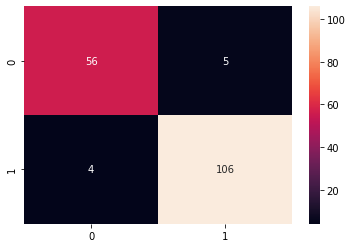

In [30]:
sns.heatmap(cm,annot=True, fmt='.0F')